In [11]:
%cd
import pandas as pd
from shapely.geometry import Point, Polygon
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

/home/jupyter


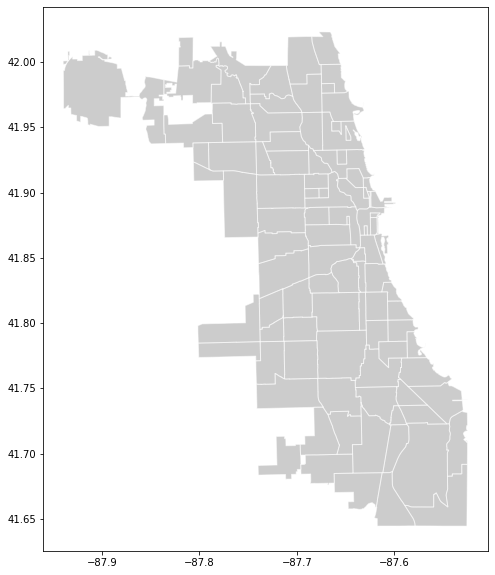

In [13]:
# load and plot chicago zipcodes 
zones = 'Python-Project-1/data/neighborhoods.shp'

map_zones = gpd.read_file(zones)
fig,ax = plt.subplots(figsize = (10,10))
zone_plot = map_zones.boundary.plot(ax = ax, color='white', linewidth = 1.0, alpha = 0.5)
zone_plot = map_zones.plot(ax=ax, color='grey', alpha = 0.4)

In [ ]:
# load pothold data and filter for missing points
pot1 = pd.read_csv('data/potholes_1.csv')
pot2 = pd.read_csv('data/potholes_2.csv')

potholes = pd.concat([pot1, pot2])
potholes = potholes.loc[potholes['LONGITUDE'] != 0]
potholes = potholes.loc[potholes['LATITUDE'] != 0]

completed = potholes.loc[potholes['STATUS'] == 'Completed']
opened = potholes.loc[potholes['STATUS'] == 'Open']

In [ ]:
# create geodataframes for open and completed potholes
crs = {'init': 'epsg:4326'}

completed_geo = [Point(xy) for xy in zip(completed['LONGITUDE'], completed['LATITUDE'])]
completed_gdf = GeoDataFrame(completed, crs = crs, geometry=completed_geo)

opened_geo = [Point(xy) for xy in zip(opened['LONGITUDE'], opened['LATITUDE'])]
opened_gdf = GeoDataFrame(opened, crs = crs, geometry=opened_geo)

In [ ]:
# plot potholes on map
map2 = completed_gdf.plot(ax = ax, markersize = 10, color = 'grey', alpha = 0.6, marker = 'o', label = 'Completed')
map2 = opened_gdf.plot(ax = ax, markersize = 10, color = 'blue', alpha = 0.7, marker = 'o', label = 'Open')

In [ ]:
# save figure as png to artifacts folder
map2.set_title(label = 'Potholes by Status', fontsize = 24, loc = 'center')
map2.legend(loc = 'upper left')
mapf = map2.get_figure()
mapf.savefig("artifacts/pothole_status_map.jpg")